# 概述
主要的分类方法，包括朴素贝叶斯(高斯、伯努利、多项式)、K近邻、决策树、随机森林、GBDT、XGBoost、Adaboost、SVM

#1 鸢尾花二特征的各种分类算法之比较

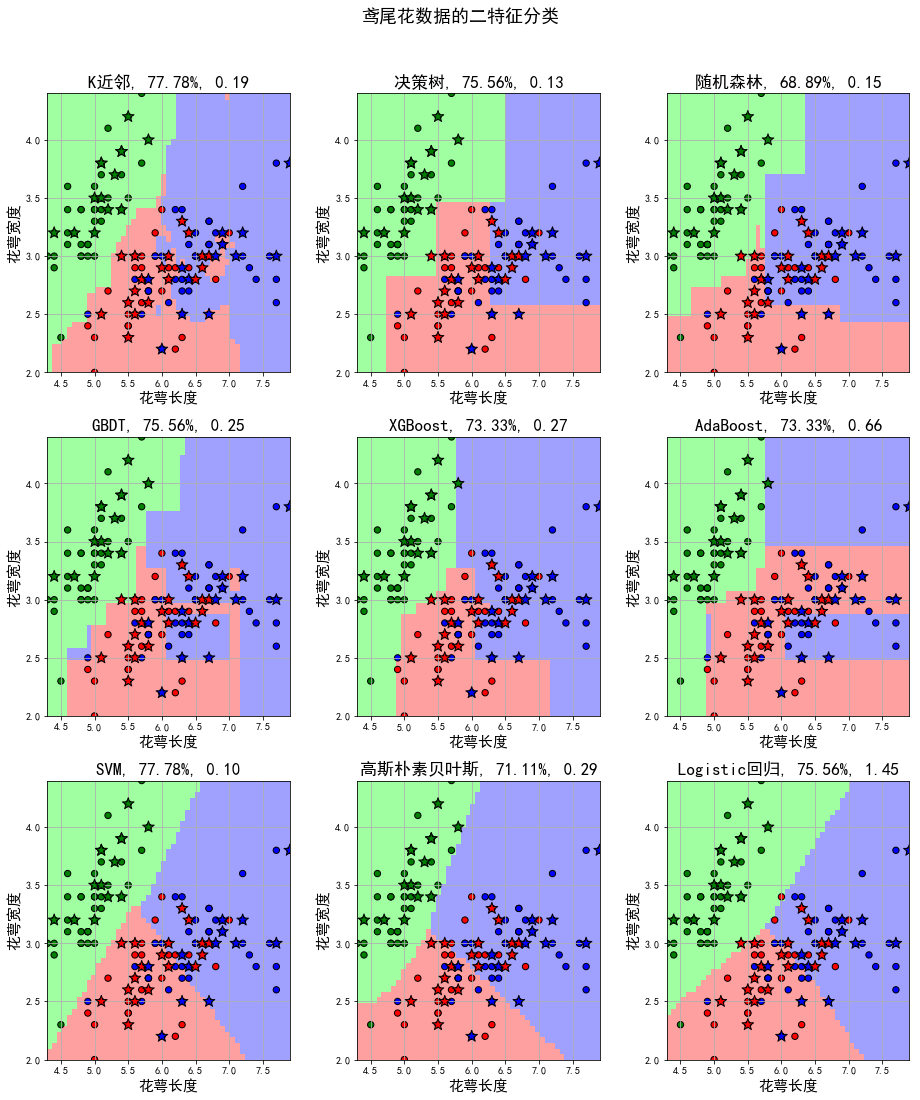

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn import svm
import matplotlib as mpl
import time

# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

data = pd.read_csv('data/iris.data', header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes
x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
priors = np.array((1,2,4), dtype=float)
priors /= priors.sum()

# 以下的各个分类器的参数，都是通过各章节的代码里面的网格搜索交叉验证得出的最优参数值
modelList=[[KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='manhattan'),'K近邻'],
           [DecisionTreeClassifier(criterion='entropy', max_depth=4),'决策树'],
           [RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=3), '随机森林'],
           [GradientBoostingClassifier(n_estimators=50, learning_rate=0.5,
                                       max_depth=1, random_state=0), 'GBDT'],
          
           [XGBClassifier(n_estimators=100, max_depth=1,learning_rate=0.1 ), 'XGBoost'],
           [AdaBoostClassifier(n_estimators=100, learning_rate=0.1), 'AdaBoost'],
           [svm.SVC(C=10, kernel='linear'), 'SVM'],
           [Pipeline([
               ('sc', StandardScaler()),
               ('poly', PolynomialFeatures(degree=1)),
               ('clf', GaussianNB(priors=priors))]), '高斯朴素贝叶斯'],
           [Pipeline([
               ('poly', PolynomialFeatures(degree=2, include_bias=True)),
               ('lr', LogisticRegressionCV(Cs=np.logspace(-3, 4, 8), cv=5, fit_intercept=False))
           ]), 'Logistic回归']]
N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
plt.figure(figsize=(13, 20), facecolor='w')

for i, clf in enumerate(modelList):
    model = clf[0]
    title = clf[1]
    startTime = time.time()
    model.fit(x_train, y_train)
    y_test_hat = model.predict(x_test)
    index = [i for i in range(1, len(x_show)+1)]
    x_show = pd.DataFrame(x_show)
    y_show_hat = model.predict(x_show)  # 预测值
    y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
    
    plt.subplot(4, 3, i+1)
    # plt.title(u'%s, 准确度: %.2f%%' % (title, 100 * model.score(x_test, y_test)), fontsize=17)
    plt.title(u'%s, %.2f%%, %.2f' % (title, 100 * model.score(x_test, y_test), time.time()-startTime), fontsize=17)
    
    plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
    plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
    plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
    plt.xlabel(iris_feature[0], fontsize=15)
    plt.ylabel(iris_feature[1], fontsize=15)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(True)
plt.suptitle('鸢尾花数据的二特征分类',fontsize=18)
plt.tight_layout(1.5)
plt.subplots_adjust(top=0.92)
plt.show()

#2 鸢尾花全特征在PCA降维的条件下的各个分类器比较

/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:80: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


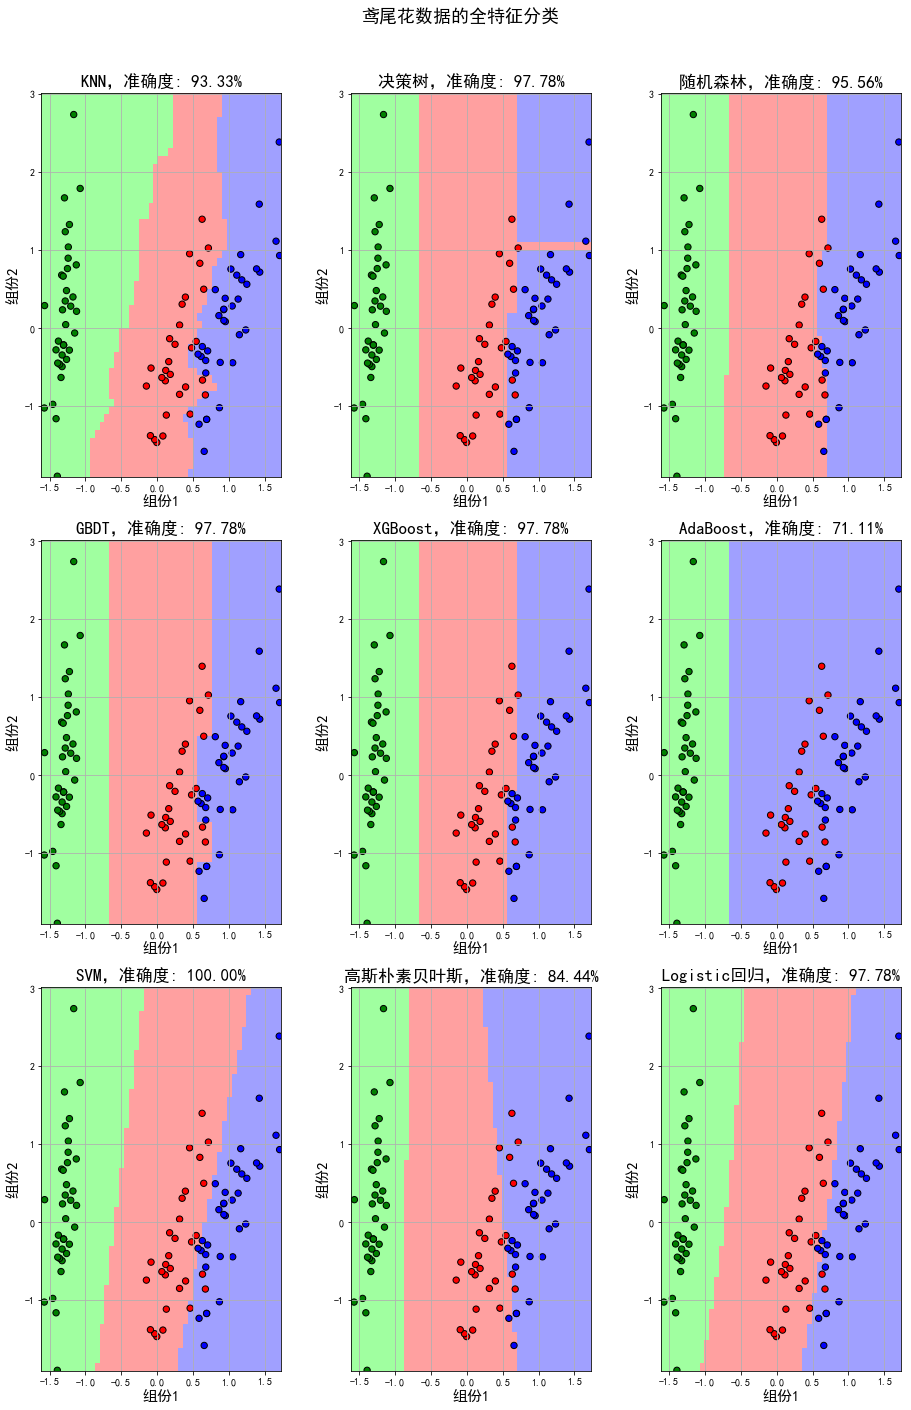

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn import svm
import matplotlib as mpl
from sklearn.decomposition import PCA

import matplotlib.patches as mpatches
def extend(a, b):
    return 1.05*a-0.05*b, 1.05*b-0.05*a

# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature = u'组份1', u'组份2'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

data = pd.read_csv('data/iris.data', header=None)
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
data.rename(columns=dict(zip(np.arange(5), columns)), inplace=True)
data['type'] = pd.Categorical(data['type']).codes
x = data.loc[:, columns[:-1]]
y = data['type']
pca = PCA(n_components=2, whiten=True, random_state=0)
x = pca.fit_transform(x)

x, x_test, y, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

priors = np.array((1,2,4), dtype=float)
priors /= priors.sum()

modelList=[
    [KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='manhattan'),'KNN'],
           [DecisionTreeClassifier(criterion='entropy', max_depth=4),'决策树'],
           [RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=3), '随机森林'],
           [GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
                                       max_depth=1, random_state=0), 'GBDT'],
           [XGBClassifier(max_depth=1), 'XGBoost'],
           [AdaBoostClassifier(n_estimators=50), 'AdaBoost'],
           [svm.SVC(C=10, kernel='linear'), 'SVM'],
           [Pipeline([
               ('sc', StandardScaler()),
               ('poly', PolynomialFeatures(degree=1)),
               ('clf', GaussianNB(priors=priors))]), '高斯朴素贝叶斯'],
           [Pipeline([
               ('poly', PolynomialFeatures(degree=2, include_bias=True)),
               ('lr', LogisticRegressionCV(Cs=np.logspace(-3, 4, 8), cv=5, fit_intercept=False))
           ]), 'Logistic回归']
    ]
N, M = 50,50 # 横纵各采样多少个值
x1_min, x1_max = extend(x_test[:, 0].min(), x_test[:, 0].max())   # 第0列的范围
x2_min, x2_max = extend(x_test[:, 1].min(), x_test[:, 1].max())   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
plt.figure(figsize=(13, 20), facecolor='w')

for i, clf in enumerate(modelList):
    model = clf[0]
    title = clf[1]
    model.fit(x,y)
    y_test_hat = model.predict(x_test)

    y_show_hat = model.predict(x_show)  # 预测值
    y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同

    plt.subplot(3, 3, i+1)
    y_test = y_test.reshape(-1)
    result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
    acc = np.mean(result)
    plt.title(u'%s，准确度: %.2f%%' % (title, 100 * model.score(x_test, y_test)), fontsize=17)

    plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
    # plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
    plt.xlabel(iris_feature[0], fontsize=15)
    plt.ylabel(iris_feature[1], fontsize=15)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(True)
plt.suptitle('鸢尾花数据的全特征分类',fontsize=18)
plt.tight_layout(1.5)
plt.subplots_adjust(top=0.92)
plt.show()